In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

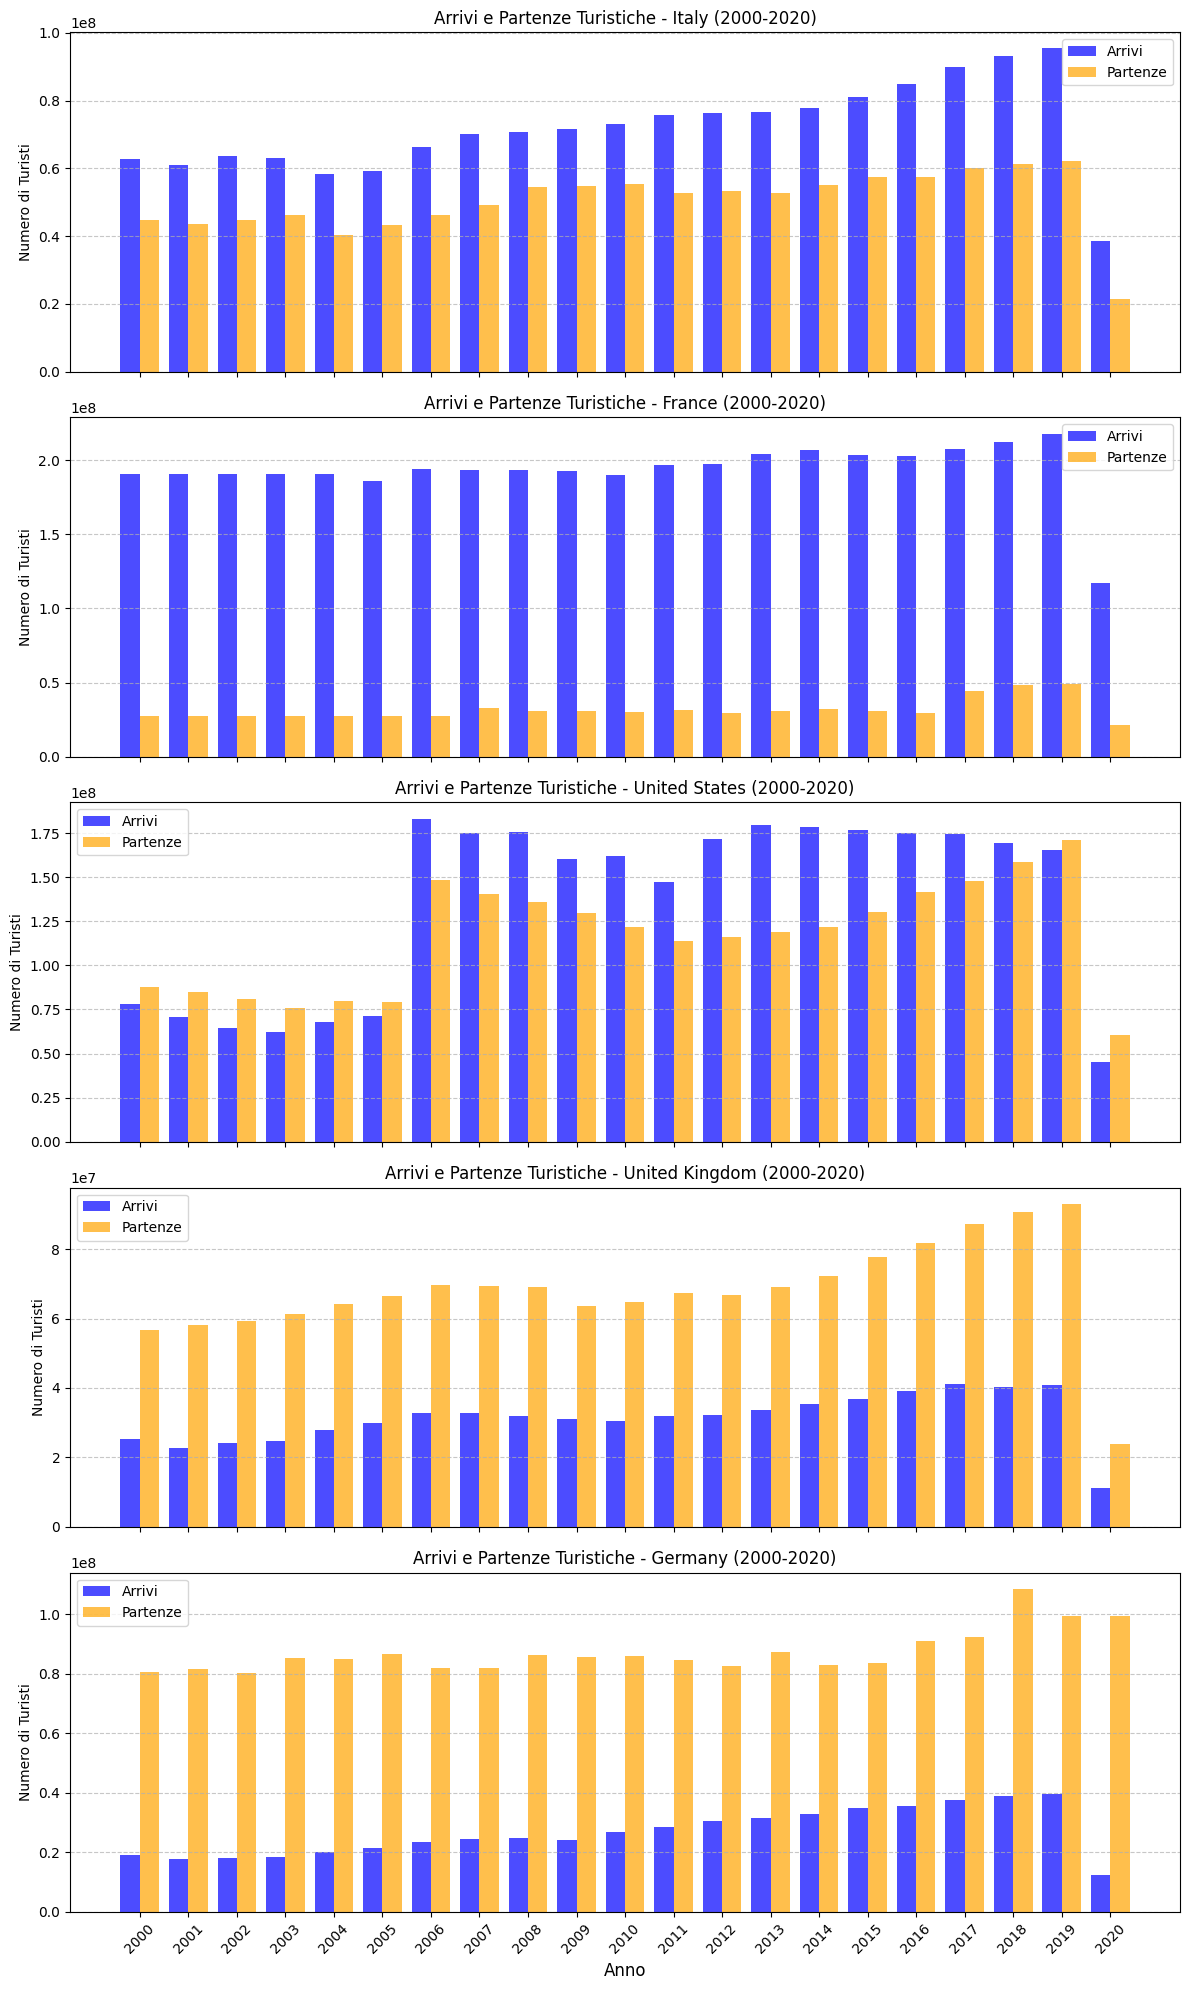

In [2]:
# Carica il dataset
df = pd.read_csv('datasets/ArrivalDepartures.csv')

# Lista dei paesi da visualizzare
countries = ['Italy', 'France', 'United States', 'United Kingdom', 'Germany']

# Crea una lista degli anni dal 2000 al 2020
years = [f"{year} [YR{year}]" for year in range(2000, 2021)]
numeric_years = list(range(2000, 2021))  # Lista degli anni come numeri

# Creazione di sottotrame (5 grafici separati)
fig, axes = plt.subplots(len(countries), 1, figsize=(12, len(countries) * 4), sharex=True)

# Estrarre i dati e creare i grafici
for i, country in enumerate(countries):
    country_data = df[df['Country Name'] == country]
    
    # Gestione dei dati: converte a numerico e interpola i valori mancanti
    arrivals = pd.to_numeric(country_data[years].iloc[0], errors='coerce') \
               .interpolate(method='linear', limit_direction='both').values
    departures = pd.to_numeric(country_data[years].iloc[1], errors='coerce') \
                 .interpolate(method='linear', limit_direction='both').values
    
    # Dati per il grafico
    x = np.arange(len(numeric_years))  # Posizioni degli anni
    width = 0.4  # Larghezza delle barre
    
    # Disegna le barre
    axes[i].bar(x - width / 2, arrivals, width=width, color='blue', alpha=0.7, label='Arrivi')
    axes[i].bar(x + width / 2, departures, width=width, color='orange', alpha=0.7, label='Partenze')
    
    # Aggiungi titolo, legenda e linee guida
    axes[i].set_title(f'Arrivi e Partenze Turistiche - {country} (2000-2020)', fontsize=12)
    axes[i].set_ylabel('Numero di Turisti', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=10)
    
# Configurazione degli assi condivisi
axes[-1].set_xlabel('Anno', fontsize=12)
plt.xticks(x, numeric_years, rotation=45)

# Miglioramenti estetici
plt.tight_layout()

# Mostra il grafico
plt.show()

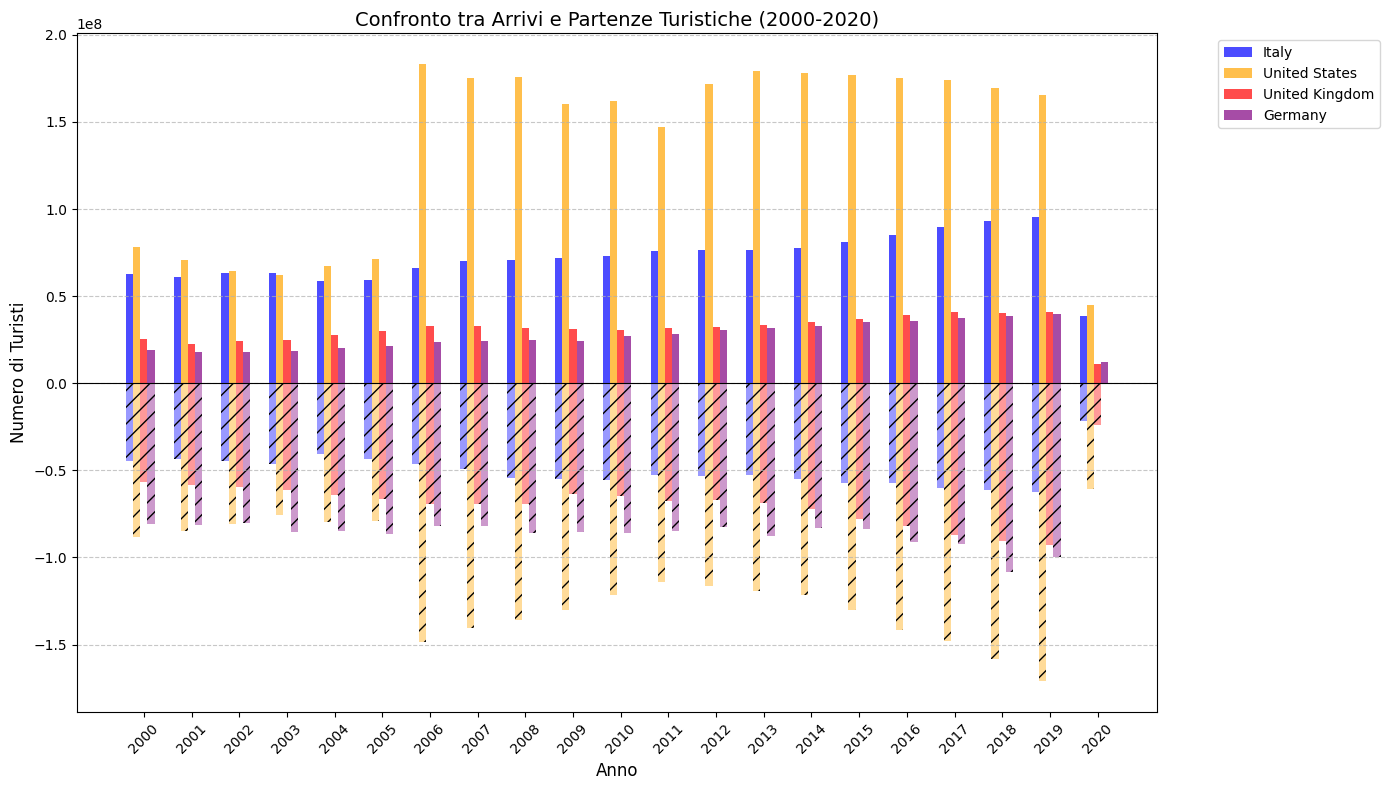

In [3]:
# Carica il dataset
df = pd.read_csv('datasets/ArrivalDepartures.csv')

# Lista dei paesi da confrontare (senza Francia)
countries = ['Italy', 'United States', 'United Kingdom', 'Germany']

# Crea una lista degli anni dal 2000 al 2020
years = [f"{year} [YR{year}]" for year in range(2000, 2021)]
numeric_years = list(range(2000, 2021))  # Lista degli anni come numeri

# Estrarre i dati per arrivi e partenze per ciascun paese
data = {}
for country in countries:
    country_data = df[df['Country Name'] == country]
    
    # Gestione dei valori non numerici
    arrivals = pd.to_numeric(country_data[years].iloc[0], errors='coerce')  # Converte in float e sostituisce ".." con NaN
    departures = pd.to_numeric(country_data[years].iloc[1], errors='coerce')  # Stessa cosa per le partenze
    
    data[country] = {
        'arrivals': arrivals.fillna(0).values,  # Sostituisce NaN con 0
        'departures': departures.fillna(0).values
    }

# Creazione del grafico
width = 0.15  # Larghezza delle barre
x = np.arange(len(numeric_years))  # Posizioni degli anni
colors = ['blue', 'orange', 'red', 'purple']  # Colori per i paesi

plt.figure(figsize=(14, 8))

# Aggiungi le barre per ogni paese
for i, country in enumerate(countries):
    plt.bar(
        x + (i - len(countries) / 2) * width,  # Posizione delle barre
        data[country]['arrivals'],  # Dati degli arrivi
        width=width,
        label=f'{country}',
        color=colors[i],
        alpha=0.7
    )
    plt.bar(
        x + (i - len(countries) / 2) * width,  # Stessa posizione per le partenze
        -data[country]['departures'],  # Dati delle partenze (negativi per differenziare)
        width=width,
        color=colors[i],
        alpha=0.4,
        hatch='//'  # Aggiunge una trama alle barre delle partenze
    )

# Aggiungi etichette e titolo
plt.title('Confronto tra Arrivi e Partenze Turistiche (2000-2020)', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di Turisti', fontsize=12)
plt.xticks(x, numeric_years, rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Linea orizzontale per separare arrivi e partenze
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Miglioramenti estetici
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostra il grafico
plt.show()

/var/folders/wk/j7524f5j4wbd819y1wd18p600000gn/T/ipykernel_11613/1437308379.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[years] = df_filtered[years].replace("..", None).astype(float).interpolate(axis=1)


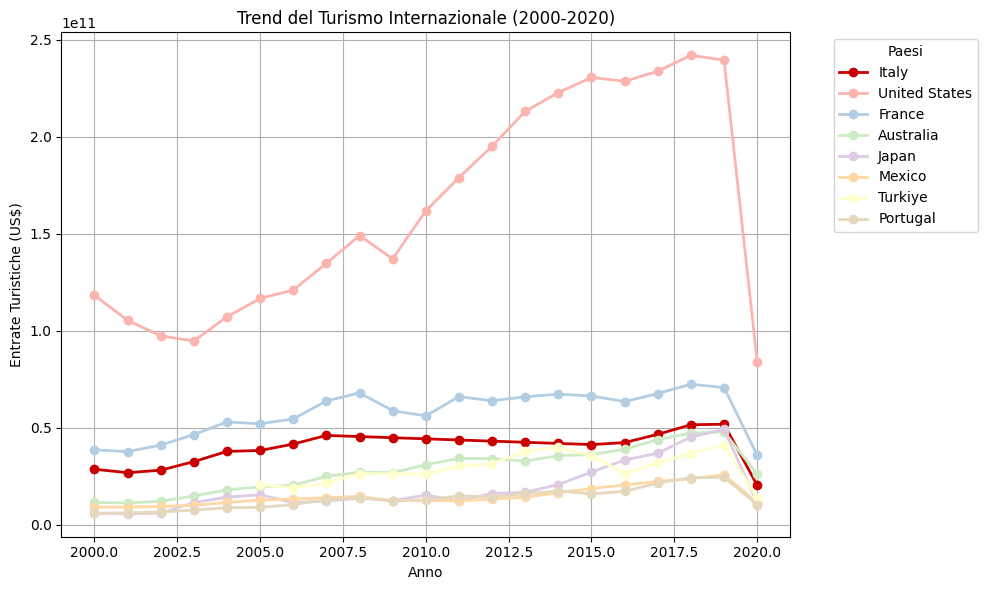

In [5]:
# Funzione per convertire il colore RGB (0-255) in formato esadecimale
def rgb_to_hex(r, g, b):
    return f"#{r:02x}{g:02x}{b:02x}"

# Carica i dati
file_path = "datasets/Receipts.csv"
df = pd.read_csv(file_path)

# Seleziona i paesi di interesse (rimuovi Cina, Sud Africa e Grecia, aggiungi Portogallo)
countries = ["Italy", "United States", "France", "Australia", "Japan", "Mexico", "Turkiye", "Portugal"]
df_filtered = df[df["Country Name"].isin(countries)]

# Estrai i nomi delle colonne che rappresentano gli anni
years = [col for col in df.columns if col.startswith("20")]

# Filtra i dati per escludere gli anni dal 2021 in poi
years = [year for year in years if int(year[:4]) <= 2020]

# Interpolazione dei valori mancanti
df_filtered[years] = df_filtered[years].replace("..", None).astype(float).interpolate(axis=1)

# Trasforma il dataset in formato lungo
df_long = df_filtered.melt(id_vars=["Country Name"], 
                           value_vars=years, 
                           var_name="Year", value_name="Receipts")

# Converte l'anno in formato numerico
df_long["Year"] = df_long["Year"].str[:4].astype(int)  # Estrae solo l'anno (es. da "2000 [YR2000]")

# Crea la palette di colori pastello per gli altri paesi (colori più tenui)
colors = sns.color_palette("Pastel1", len(countries) - 1)  # Usa Pastel1 per gli altri paesi

# Crea un dizionario per i colori dei paesi
color_dict = {country: rgb_to_hex(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
              for country, color in zip(countries[1:], colors)}  # Colori per gli altri paesi

# Colore saturato per l'Italia (un rosso più acceso)
color_dict["Italy"] = rgb_to_hex(200, 0, 0)  # Colore rosso molto saturo per l'Italia

# Crea il grafico con Matplotlib
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df_long[df_long["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Receipts"], label=country, 
             color=color_dict.get(country, "#1f77b4"), marker='o', markersize=6, linewidth=2)

# Personalizza il grafico
plt.title("Trend del Turismo Internazionale (2000-2020)")
plt.xlabel("Anno")
plt.ylabel("Entrate Turistiche (US$)")
plt.legend(title="Paesi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Per evitare che le etichette vengano tagliate

# Mostra il grafico
plt.show()